# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [3]:
if not os.path.exists("lut.py"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py 

import lut

--2020-10-31 16:32:45--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.112.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.112.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10330 (10K) [text/plain]
Saving to: ‘lut.py’

lut.py              100%[===================>]  10,09K  --.-KB/s    in 0,003s  

2020-10-31 16:32:45 (3,05 MB/s) - ‘lut.py’ saved [10330/10330]



Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

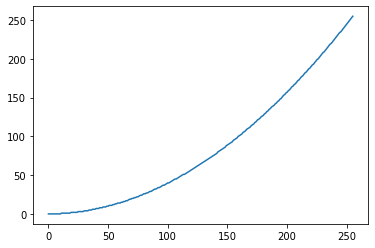

In [ ]:
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

--2020-10-24 11:42:47--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘lena.bmp’

lena.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.03s   

2020-10-24 11:42:47 (2.32 MB/s) - ‘lena.bmp’ saved [66616/66616]



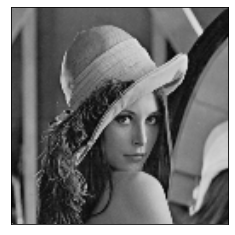

In [ ]:
if not os.path.exists("lena.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp

I = cv2.imread("lena.bmp")
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

[[[136 136 136]
  [136 136 136]
  [136 136 136]
  ...
  [129 129 129]
  [114 114 114]
  [114 114 114]]

 [[136 136 136]
  [136 136 136]
  [136 136 136]
  ...
  [129 129 129]
  [114 114 114]
  [114 114 114]]

 [[134 134 134]
  [133 133 133]
  [133 133 133]
  ...
  [ 89  89  89]
  [ 72  72  72]
  [ 72  72  72]]

 ...

 [[ 28  28  28]
  [ 28  28  28]
  [ 28  28  28]
  ...
  [ 56  56  56]
  [ 59  59  59]
  [ 59  59  59]]

 [[ 29  29  29]
  [ 28  28  28]
  [ 27  27  27]
  ...
  [ 63  63  63]
  [ 65  65  65]
  [ 65  65  65]]

 [[136 136 136]
  [136 136 136]
  [ 27  27  27]
  ...
  [ 71  71  71]
  [ 72  72  72]
  [ 72  72  72]]]
[  0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   1   1
   1   2   2   2   2   2   2   3   3   3   3   3   4   4   4   4   5   5
   5   6   6   6   7   7   7   8   8   8   9   9   9  10  10  11  11  11
  12  12  13  13  14  14  14  15  15  16  16  17  17  18  19  19  20  20
  21  21  22  22  23  24  24  25  26  26  27  27  28  29  29  30  31  32
  32 

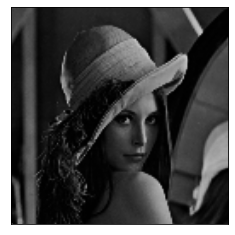

In [ ]:
lutted = cv2.LUT(I,lut.kwadratowa)
print(I)
print(lut.kwadratowa)
print(lutted)
plt.imshow(lutted)
plt.xticks([]), plt.yticks([])
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [ ]:
def LUT(img, coding):
  lutted = cv2.LUT(img, coding)
  plt.imshow(lutted)
  plt.xticks([]), plt.yticks([])
  plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

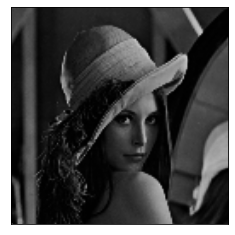

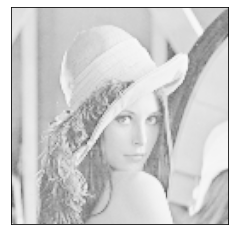

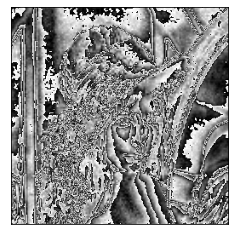

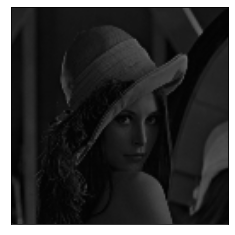

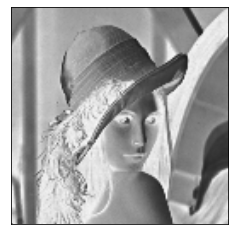

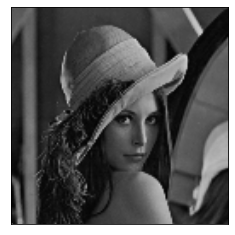

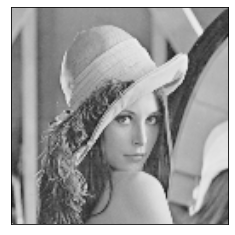

In [ ]:
LUT(I,lut.kwadratowa)
LUT(I,lut.log)
LUT(I,lut.pila)
LUT(I,lut.odwlog)
LUT(I,lut.odwrotna)
LUT(I,lut.wykladnicza)
LUT(I,lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

--2020-10-24 11:42:48--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66616 (65K) [image/bmp]
Saving to: ‘jet.bmp’

jet.bmp             100%[===================>]  65.05K  --.-KB/s    in 0.03s   

2020-10-24 11:42:48 (2.27 MB/s) - ‘jet.bmp’ saved [66616/66616]



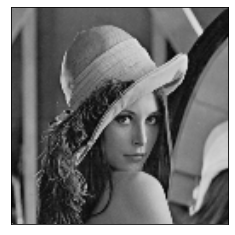

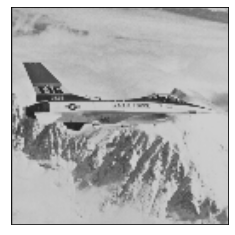

In [ ]:
if not os.path.exists("jet.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

I2 = cv2.imread("jet.bmp")
plt.imshow(I)
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(I2)
plt.xticks([]), plt.yticks([])
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

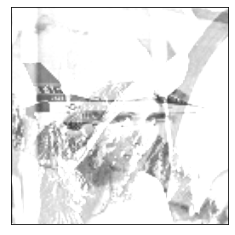

In [ ]:
sum = cv2.add(I,I2)
plt.imshow(sum)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

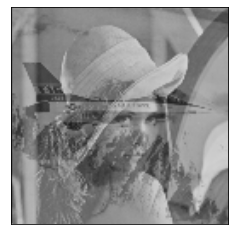

In [ ]:
lena16 = I.astype("uint16")
jet16 = I2.astype("uint16")
sum = (cv2.add(lena16,jet16)/2).astype("uint8")
plt.imshow(sum)
plt.xticks([]), plt.yticks([])
plt.show()


### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

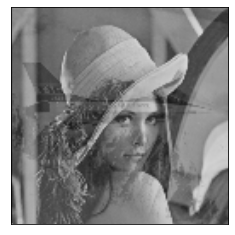

In [ ]:
sum = cv2.addWeighted(I,0.7,I2,0.3,0)
plt.imshow(sum)
plt.xticks([]), plt.yticks([])
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

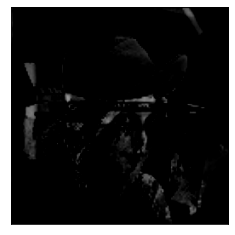

In [ ]:
sub = cv2.subtract(I,I2)
plt.imshow(sub)
plt.xticks([]), plt.yticks([])
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

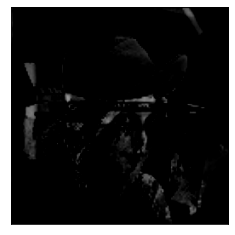

In [ ]:
lena16 = I.astype('uint16')
jet16 = I2.astype('uint16')
abssub = np.abs(cv2.subtract(lena16,jet16))
plt.imshow(abssub)
plt.xticks([]), plt.yticks([])
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

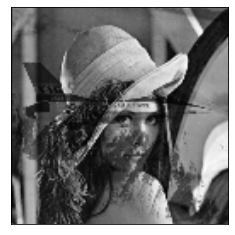

In [ ]:
mul = cv2.multiply(I.astype("float64"),I2.astype("float64"))
mul = mul/mul.max()*255
mul = mul.astype("uint8")
plt.imshow(mul)
plt.xticks([]), plt.yticks([])
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

--2020-10-24 11:42:49--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: ‘kolo.bmp’

kolo.bmp            100%[===================>]  65.05K  --.-KB/s    in 0.03s   

2020-10-24 11:42:49 (2.25 MB/s) - ‘kolo.bmp’ saved [66614/66614]



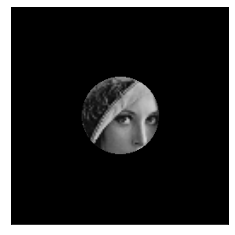

In [ ]:
if not os.path.exists("kolo.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp

maska = cv2.imread("kolo.bmp").astype('bool').astype('uint8')
mul = cv2.multiply(I,maska)
plt.imshow(mul)
plt.xticks([]), plt.yticks([])
plt.show()


### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

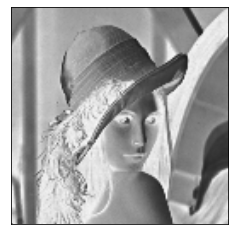

In [ ]:
notbit = cv2.bitwise_not(I)
plt.imshow(notbit)
plt.xticks([]), plt.yticks([])
plt.show()



## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

--2020-10-24 11:42:49--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 66614 (65K) [image/bmp]
Saving to: ‘kwadrat.bmp’

kwadrat.bmp         100%[===================>]  65.05K  --.-KB/s    in 0.03s   

2020-10-24 11:42:50 (2.31 MB/s) - ‘kwadrat.bmp’ saved [66614/66614]



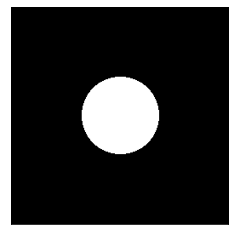

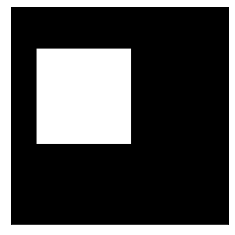

In [ ]:
kolo = cv2.imread("kolo.bmp")

if not os.path.exists("kwadrat.bmp"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kwadrat = cv2.imread("kwadrat.bmp")
plt.imshow(kolo)
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(kwadrat)
plt.xticks([]), plt.yticks([])
plt.show()



Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

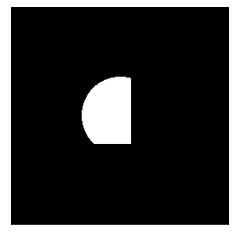

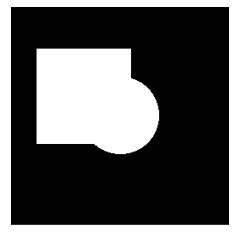

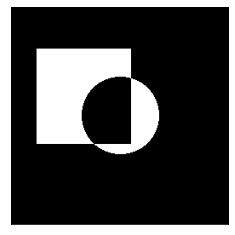

In [ ]:
bitand = cv2.bitwise_and(kolo,kwadrat)
bitor=cv2.bitwise_or(kolo,kwadrat)
bitxor=cv2.bitwise_xor(kolo,kwadrat)

plt.imshow(bitand)
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(bitor)
plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(bitxor)
plt.xticks([]), plt.yticks([])
plt.show()

## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.